<a href="https://colab.research.google.com/github/rakshadharanika/nn-classification/blob/main/EXP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
91/91 [==============================] - 3s 14ms/step - loss: 1.4970 - accuracy: 0.2618 - val_loss: 1.3789 - val_accuracy: 0.2603
Epoch 2/20
91/91 [==============================] - 1s 13ms/step - loss: 1.3599 - accuracy: 0.3072 - val_loss: 1.3551 - val_accuracy: 0.3408
Epoch 3/20
91/91 [==============================] - 1s 13ms/step - loss: 1.3384 - accuracy: 0.3616 - val_loss: 1.3379 - val_accuracy: 0.3709
Epoch 4/20
91/91 [==============================] - 1s 12ms/step - loss: 1.3138 - accuracy: 0.3843 - val_loss: 1.3119 - val_accuracy: 0.3946
Epoch 5/20
91/91 [==============================] - 0s 5ms/step - loss: 1.2844 - accuracy: 0.4046 - val_loss: 1.2866 - val_accuracy: 0.4106
Epoch 6/20
91/91 [==============================] - 0s 5ms/step - loss: 1.2613 - accuracy: 0.4169 - val_loss: 1.2714 - val_accuracy: 0.4164
Epoch 7/20
91/91 [==============================] - 0s 5ms/step - loss: 1.2488 - accuracy: 0.4229 - val_loss: 1.2666 - val_accuracy: 0.4302
Epoch 8/20
91/91

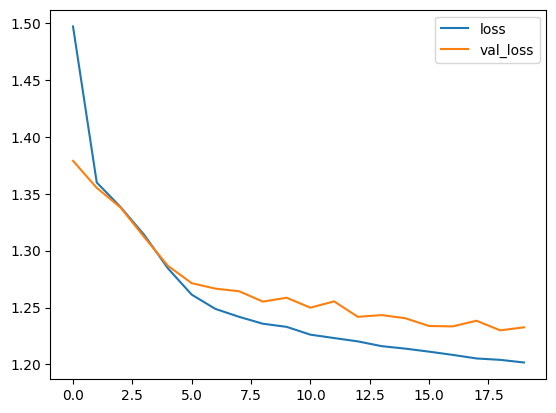

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt

customer_df = pd.read_csv('/content/drive/MyDrive/data set/customers.csv')

customer_df.columns
customer_df.dtypes
customer_df.shape

customer_df.isnull().sum()

customer_df_cleaned = customer_df.dropna(axis=0)
customer_df_cleaned.isnull().sum()

customer_df_cleaned.shape
customer_df_cleaned.dtypes

customer_df_cleaned['Gender'].unique()
customer_df_cleaned['Ever_Married'].unique()
customer_df_cleaned['Graduated'].unique()
customer_df_cleaned['Profession'].unique()
customer_df_cleaned['Spending_Score'].unique()
customer_df_cleaned['Var_1'].unique()
customer_df_cleaned['Segmentation'].unique()


categories_list=[['Male', 'Female'],
           ['No', 'Yes'],
           ['No', 'Yes'],
           ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
            'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
           ['Low', 'Average', 'High']
           ]

enc = OrdinalEncoder(categories=categories_list)

customers_1 = customer_df_cleaned.copy()

customers_1[['Gender',
             'Ever_Married',
              'Graduated','Profession',
              'Spending_Score']] = enc.fit_transform(customers_1[['Gender',
                                                                 'Ever_Married',
                                                                 'Graduated','Profession',
                                                                 'Spending_Score']])

customers_1.dtypes

le = LabelEncoder()

customers_1['Segmentation'] = le.fit_transform(customers_1['Segmentation'])
customers_1.dtypes

customers_1 = customers_1.drop('ID',axis=1)
customers_1 = customers_1.drop('Var_1',axis=1)

customers_1.dtypes

customers_1['Segmentation'].unique()

X=customers_1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values
y1 = customers_1[['Segmentation']].values


one_hot_enc = OneHotEncoder()
one_hot_enc.fit(y1)
y1.shape


y = one_hot_enc.transform(y1).toarray()
y.shape
y1[0]
y[0]
X.shape

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.66,
                                               random_state=50)

X_train[0]
X_train.shape

scaler_age = MinMaxScaler()
scaler_age.fit(X_train[:,2].reshape(-1,1))

X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)

X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

my_ai=Sequential([
    Dense(units=5,activation='relu',input_shape=[8]),
    Dense(units=6,activation='relu'),
    Dense(units=8,activation='relu'),
    Dense(units=7,activation='softmax')
])

my_ai.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

my_ai.fit(x=X_train_scaled,y=y_train,
             epochs=20,
             batch_size= 33,
             validation_data=(X_test_scaled,y_test),
             )

metrics = pd.DataFrame(my_ai.history.history)
metrics.head()
metrics[['loss','val_loss']].plot()

x_test_predictions = np.argmax(my_ai.predict(X_test_scaled), axis=1)
x_test_predictions.shape
y_test_truevalue = np.argmax(y_test,axis=1)
y_test_truevalue.shape

print(confusion_matrix(y_test_truevalue,x_test_predictions))
print(classification_report(y_test_truevalue,x_test_predictions))

x_single_prediction = np.argmax(my_ai.predict(X_test_scaled[1:2,:]), axis=1)

print(x_single_prediction)
print(le.inverse_transform(x_single_prediction))